# **Install/load packages**

In [6]:
# Install transformer packages
!pip install --quiet simpletransformers==0.49.7
!pip install --quiet transformers==3.5.1
!pip uninstall tensorflow
!conda install tensorflow-gpu 

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - tensorflow-gpu

Current channels:

  - https://repo.anaconda.com/pkgs/main/osx-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/osx-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [9]:
# Import general packages
import simpletransformers
import transformers
from os import chdir
import pandas as pd
import numpy as np

SyntaxError: illegal target for annotation (<ipython-input-9-9e6e0e2dd47d>, line 7)

# **Set up working directory**

In [ ]:
# from google.colab import drive 
# drive.mount('/content/drive')
# %cd /content/drive/My\ Drive/BERT/Populism/Annotated_data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/BERT/Populism/Annotated_data


# **Load the Data**

In [ ]:
#Load Bart/Yuchen annotations
annotated_par_yuchen_1 = pd.read_csv('annotated_par_yuchen_1.csv',sep=',', lineterminator='\r',encoding='utf8')
annotated_par_yuchen_1['speech_par_id'] = annotated_par_yuchen_1['Speech_id'].str.cat(annotated_par_yuchen_1['par_id'].apply(str), sep='_')
annotated_par_yuchen_1['label'] = np.where(annotated_par_yuchen_1['label'] == 0, 'not populist', 'populist')

annotated_par_bart_1 = pd.read_csv('annotated_par_bart_1.csv',sep=',', lineterminator='\r',encoding='utf8')
annotated_par_bart_1['speech_par_id'] = annotated_par_bart_1['Speech_id'].str.cat(annotated_par_bart_1['par_id'].apply(str), sep='_')
annotated_par_bart_2 = pd.read_csv('annotated_par_bart_2.csv',sep=',', lineterminator='\r',encoding='utf8')
annotated_par_bart_2['speech_par_id'] = annotated_par_bart_2['Speech_id'].str.cat(annotated_par_bart_2['par_id'].apply(str), sep='_')

#Load Oscar (subset the ones NOT selected via keywords)
annotated_par_oscar_1 = pd.read_csv('annotated_par_oscar_1.csv',sep=',', lineterminator='\r',encoding='utf8')
annotated_par_oscar_1 = annotated_par_oscar_1[annotated_par_oscar_1.drawn.isin(['randomly'])]

#Load Yuchen (subset the ones NOT selected via keywords)
annotated_par_yuchen_2 = pd.read_csv('annotated_par_yuchen_2.csv',sep=',', lineterminator='\r',encoding='utf8')
annotated_par_yuchen_2 = annotated_par_yuchen_2[annotated_par_yuchen_2.drawn.isin(['randomly'])]
annotated_par_yuchen_2['speech_par_id'] = annotated_par_yuchen_2['Speech_id'].str.cat(annotated_par_yuchen_2['par_id'].apply(str), sep='_')

#Load Yuchen 3 (relabel the labels)
annotated_par_yuchen_3 = pd.read_csv('annotated_par_yuchen_3.csv',sep=',', lineterminator='\r',encoding='utf8')
annotated_par_yuchen_3['label'] = np.where(annotated_par_yuchen_3['label'] == 0, 'not populist', 'populist')

# **Wrangle the data**

In [ ]:
### Concatenate the annotated files
annotated_par_df = pd.concat([annotated_par_yuchen_1[['text',"label", "speech_par_id"]],
                              annotated_par_yuchen_2[['text',"label", "speech_par_id"]],
                              annotated_par_yuchen_3[['text',"label", "speech_par_id"]],
                              annotated_par_oscar_1[['text',"label", "speech_par_id"]],
                              annotated_par_bart_1[['text',"label", "speech_par_id"]],
                              annotated_par_bart_2[['text',"label", "speech_par_id"]]], ignore_index=True)
### Only take unique ones, then only take 2200 to have round number
is_duplicated = annotated_par_df.duplicated(subset=['speech_par_id'])
annotated_par_df = annotated_par_df[is_duplicated.isin([False])]
annotated_par_df = annotated_par_df[0:2200]

(2200, 3) 

Values:
 not populist    2141
populist          59
Name: label, dtype: int64 




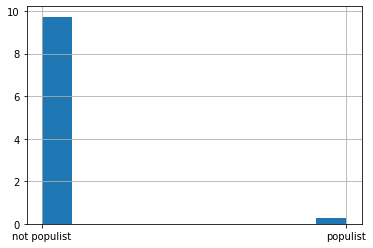

In [ ]:
### Inspect
print(annotated_par_df.shape, "\n")
print("Values:\n", annotated_par_df["label"].value_counts(), "\n\n")
annotated_par_df["label"].hist(density = 1)

### Make label
annotated_par_df['pred_class'] = np.where(annotated_par_df['label'] == 'not populist', 0, 1)
df = annotated_par_df[['text','pred_class']]

# **Find suitable hyperparameters**

In [ ]:
hyperparameter_df = pd.DataFrame(columns=['K_fold', 'learning_rate', 'epochs', 'batch_size', 'loss_func', 'PR_AUC', 'ROC_AUC'])

epochs = [2,3,4,5,7]
batch_size = [2,4,8,12]
loss_funcs = [1,2,4]
learning_rates = [1e-5, 3e-5, 4e-5, 6e-5]

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
import statistics

In [ ]:
for val_index, val_index in kf.split(train_data['text'], train_data['pred_class']):  
    print(val_index)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

,split_seed,learning_rate,epochs,batch_size,loss_func,PR_AUC,ROC_AUC


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
import statistics

# Dataset
train_data = pd.DataFrame(df)
seed = 278895
# prepare cross validation
n = 5
repeats = 5
#kf = KFold(n_splits=n, random_state=seed, shuffle=True)
kf =  StratifiedKFold(n_splits=n, random_state=seed)

acc_results = []
roc_auc_results = []
pr_auc_results = []
K = 1

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from simpletransformers.classification import ClassificationArgs, ClassificationModel
import scipy
from scipy.special import softmax
import statistics

# Dataset
train_data = pd.DataFrame(df)
seed = 278895
# prepare cross validation
n = 5
repeats = 5
#kf = KFold(n_splits=n, random_state=seed, shuffle=True)
kf =  RepeatedStratifiedKFold(n_splits=n, n_repeats=repeats, random_state=seed)

acc_results = []
roc_auc_results = []
pr_auc_results = []
K = 1

for train_index, val_index in kf.split(train_data['text'], train_data['pred_class']):
    print("K is:", K, "\n")
    K = K+1
    # splitting Dataframe (dataset not included)
    train_df = train_data.iloc[train_index]
    val_df = train_data.iloc[val_index]
    # splitting Dataframe (dataset not included)

    # Define Weights
    pos = train_df["pred_class"].value_counts()[1]
    neg = train_df["pred_class"].value_counts()[0]
    class_weight = [pos, neg]
    print("Weights check:", class_weight, "\n")

    # Define trining argument:
    train_args ={"reprocess_input_data": True,
               "fp16":False,
               "num_train_epochs": 2,
               'overwrite_output_dir': True,
               'train_batch_size': 8,
               'learning_rate': 3e-5
               }

    model = MultiLabelClassificationModel('distilbert', 'distilbert-base-uncased', num_labels=6, 

    # Defining Model
    model = ClassificationModel("roberta", "roberta-base",
                                num_labels=2,
                                weight=class_weight,
                                args=train_args,
                                use_cuda = True)
    # Train the model
    model.train_model(train_df, verbose = False, silent = True)

    # Validate the model
    result, model_outputs, wrong_predictions = model.eval_model(val_df, f1=f1_multiclass, acc=accuracy_score)

    # Accuracy
    acc_results.append(result['acc'])

    # AUC
    probabilities = softmax(model_outputs, axis=1)
    probabilities
    data = {'Predictions_prob_1':[l[1] for l in probabilities], 'pred_class':val_df['pred_class']} 
    auc_df = pd.DataFrame(data)
    auc_df = auc_df.sort_values('Predictions_prob_1', ascending=False)
    fpr, tpr, thresholds = metrics.roc_curve(auc_df['pred_class'],
                                           auc_df['Predictions_prob_1'], 
                                           pos_label=1)
    roc_auc = metrics.auc(fpr, tpr)
    roc_auc_results.append(roc_auc)

    precision, recall, thresholds = metrics.precision_recall_curve(auc_df['pred_class'],
                                                        auc_df['Predictions_prob_1'],
                                                        pos_label=1)
    pr_auc = metrics.auc(recall, precision)
    pr_auc_results.append(pr_auc)


    print("Current AUC is:", auc, "\n",
        "Running average ROC AUC is:", statistics.mean(roc_auc_results), "\n",
        "Running average PR AUC is:", statistics.mean(pr_auc_results), "\n",
        "Based on:", K, "runs \n")

SyntaxError: ignored

# **Make Text and Training split**

In [ ]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=500, random_state = 798423)
eval_df, test_df = train_test_split(test_df, test_size=0.5, random_state = 798423)

print('train shape: ',train_df.shape)
print('test shape: ',test_df.shape)
print('test shape: ',eval_df.shape)

train_df.head()
print("Values:\n", train_df["pred_class"].value_counts(), "\n\n")
print("Values:\n", test_df["pred_class"].value_counts(), "\n\n")
print("Values:\n", eval_df["pred_class"].value_counts(), "\n\n")

train shape:  (1700, 2)
test shape:  (250, 2)
test shape:  (250, 2)
Values:
 0    1654
1      46
Name: pred_class, dtype: int64 


Values:
 0    242
1      8
Name: pred_class, dtype: int64 


Values:
 0    245
1      5
Name: pred_class, dtype: int64 




# **Find good hyperparameters**

In [ ]:
import logging
from statistics import mean, mode

import pandas as pd
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split

import wandb
from simpletransformers.classification import ClassificationArgs, ClassificationModel

In [ ]:
?wandb.log

In [ ]:
#from utils import load_rte_data_file

#wandb.log({"pr" : wandb.plot.pr_curve(ground_truth, predictions,
#                     labels=None, classes_to_plot=None)})

sweep_config = {
    "name": "vanilla-sweep-batch-16",
    "method": "bayes",
    "metric": {"name": "PR_AUC", "goal": "maximize"},
    "parameters": {
        "num_train_epochs": {"min": 1, "max": 10},
        "learning_rate": {"min": 0, "max": 4e-4},
    },
    "early_terminate": {"type": "hyperband", "min_iter": 6,},
}

sweep_id = wandb.sweep(sweep_config, project="20201209 - Populism Hyperparameter Optimization")

logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

model_args = ClassificationArgs()
model_args.eval_batch_size = 8
model_args.evaluate_during_training = True
model_args.evaluate_during_training_silent = False
model_args.evaluate_during_training_steps = 1000
model_args.learning_rate = 4e-4
model_args.manual_seed = 4
model_args.max_seq_length = 256
model_args.multiprocessing_chunksize = 5000
model_args.no_cache = True
model_args.no_save = True
model_args.num_train_epochs = 10
model_args.overwrite_output_dir = True
model_args.reprocess_input_data = True
model_args.train_batch_size = 16
model_args.gradient_accumulation_steps = 2
model_args.train_custom_parameters_only = False
model_args.labels_list = [0, 1]
model_args.wandb_project = "20201209 - Populism Hyperparameter Optimization"

# Define weights proportional to class prevalence
pos = train_df["pred_class"].value_counts()[1]
neg = train_df["pred_class"].value_counts()[0]/2
class_weight = [pos, neg]
print(class_weight)

def train():
    # Initialize a new wandb run
    wandb.init()

    # Create a TransformerModel
    model = ClassificationModel(
        "roberta",
        "roberta-base",
        use_cuda=True,
        args=model_args,
        weight=class_weight,
        sweep_config=wandb.config,
    )

    # Train the model
    model.train_model(
        train_df,
        eval_df=eval_df,
        accuracy=lambda truth, predictions: accuracy_score(
            truth, [round(p) for p in predictions]
        ),
    )

    # Get PR AUC:

    # Validate the model
    result, model_outputs, wrong_predictions = model.eval_model(val_df, f1=f1_multiclass, acc=accuracy_score)

    # AUC
    probabilities = softmax(model_outputs, axis=1)
    data = {'Predictions_prob_1':[l[1] for l in probabilities], 'pred_class':val_df['pred_class']} 
    auc_df = pd.DataFrame(data)
    auc_df = auc_df.sort_values('Predictions_prob_1', ascending=False)
    fpr, tpr, thresholds = metrics.roc_curve(auc_df['pred_class'],
                                           auc_df['Predictions_prob_1'], 
                                           pos_label=1)

    precision, recall, thresholds = metrics.precision_recall_curve(auc_df['pred_class'],
                                                        auc_df['Predictions_prob_1'],
                                                        pos_label=1)
    pr_auc = metrics.auc(recall, precision)

    wandb.log({"PR_AUC": pr_auc})

    # Sync wandb
    wandb.join()

Create sweep with ID: hi9amq2n
Sweep URL: https://wandb.ai/oscar_maria/NEWNEWNEW%20-%20Hyperparameter%20Optimization/sweeps/hi9amq2n
[38, 681.0]


In [ ]:
wandb.agent(sweep_id, train)

wandb: Agent Starting Run: kgzsy3fh with config:
wandb: 	learning_rate: 0.00035207788028258463
wandb: 	num_train_epochs: 1


Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out

/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:901: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
INFO:simpletransformers.classification.classification_model: Training of roberta model complete. Saved to outputs/.


global_step,44
tp,0
tn,291
fp,0
fn,9
mcc,0.0
train_loss,0.05583
eval_loss,0.56207
accuracy,0.97
_step,0
_runtime,35


global_step,▁
tp,▁
tn,▁
fp,▁
fn,▁
mcc,▁
train_loss,▁
eval_loss,▁
accuracy,▁
_step,▁
_runtime,▁


Run kgzsy3fh errored: NameError("name 'val_df' is not defined",)
wandb: ERROR Run kgzsy3fh errored: NameError("name 'val_df' is not defined",)
wandb: Agent Starting Run: 10xugk4o with config:
wandb: 	learning_rate: 0.00013595813945179477
wandb: 	num_train_epochs: 1


Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out

wandb: Ctrl + C detected. Stopping sweep.


# **Load Transformers and set up**

In [ ]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.1)

print('train shape: ',train_df.shape)
print('test shape: ',test_df.shape)

train_df.head()
print("Values:\n", train_df["pred_class"].value_counts(), "\n\n")
print("Values:\n", test_df["pred_class"].value_counts(), "\n\n")


train shape:  (1800, 2)
test shape:  (200, 2)
Values:
 0    1755
1      45
Name: pred_class, dtype: int64 


Values:
 0    193
1      7
Name: pred_class, dtype: int64 




In [ ]:
from simpletransformers.classification import ClassificationModel

In [ ]:
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
pos = train_df["pred_class"].value_counts()[1]
neg = train_df["pred_class"].value_counts()[0]
total = train_df.shape[0]

weight_for_0 = (1 / neg)*(total)/2.0
weight_for_1 = (1 / pos)*(total)/2.0

class_weight = [pos, neg]


print('Weight for class 0: {:.2f}'.format(class_weight[0]))
print('Weight for class 1: {:.2f}'.format(class_weight[1]))
print('Weight for class 0: {:.2f}'.format(class_weight[0]))
print('Weight for class 1: {:.2f}'.format(class_weight[1]))

Weight for class 0: 45.00
Weight for class 1: 1755.00
Weight for class 0: 45.00
Weight for class 1: 1755.00


In [ ]:
train_args ={"reprocess_input_data": True,
               "fp16":False,
               "num_train_epochs": 2,
               'overwrite_output_dir': True
               }


model = ClassificationModel(
    "roberta", "roberta-base",
    num_labels=2,
    weight=class_weight,
    args=train_args,
    use_cuda = True)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out

In [ ]:
train_df.head()

,text,pred_class
1128,"No wonder, when we tried to help the unemploye...",0
666,"Now, it's time, with all these dramatic change...",0
554,So I simply came out to congratulate you on th...,0
1516,From military spending so wasteful that we can...,0
1280,She will -- she will allow people into our cou...,0


# **Train the Model**

In [ ]:
model.train_model(train_df)

/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:380: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:216: UserWarning: Please also save or load the state of the optimizer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)


(450, 0.7645954107852756)

# **Check results**

In [ ]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, auc

def f1_multiclass(labels, preds):
    return f1_score(labels, preds, average='micro')
    
result, model_outputs, wrong_predictions = model.eval_model(test_df, f1=f1_multiclass, acc=accuracy_score)
result

/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:901: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


{'acc': 0.965,
 'eval_loss': 1.1740099299699067,
 'f1': 0.965,
 'fn': 7,
 'fp': 0,
 'mcc': 0.0,
 'tn': 193,
 'tp': 0}

In [ ]:
import scipy
from scipy.special import softmax
probabilities = softmax(model_outputs, axis=1)
test_df["Predictions_prob_1"] = [l[1] for l in probabilities]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
sorted_df = test_df.sort_values('Predictions_prob_1', ascending=False)
#sorted_df.head(10)

In [ ]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(sorted_df['pred_class'], 
                                         sorted_df['Predictions_prob_1'], pos_label=1)
print(metrics.auc(fpr, tpr))

0.7409326424870466


# **Predict data**

In [ ]:
%cd /content/drive/My\ Drive/BERT/Populism/To_predict_data
to_predict_df = pd.read_csv('20201110_all_paragraphs.csv',sep=',', lineterminator='\n',encoding='utf8')


/content/drive/My Drive/BERT/Populism/To_predict_data


In [ ]:
to_predict_df.shape

(72379, 8)

In [ ]:
predictions = model.predict(list(to_predict_df['text'][0:14999]))

In [ ]:
predictions_2 = model.predict(list(to_predict_df['text'][20000:72000]))

Process ForkPoolWorker-9:
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.6/multiprocessing/pool.py", line 119, in worker
    result = (True, func(*args, **kwds))
  File "/usr/lib/python3.6/multiprocessing/pool.py", line 44, in mapstar
    return list(map(*args))
  File "/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_utils.py", line 130, in convert_example_to_feature
    tokens_a = tokenizer.tokenize(" " + example.text_a)
  File "/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils.py", line 352, in tokenize
    tokenized_text = split_on_tokens(no_split_token, text)
  File "/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils.py", line 346, in split_on_tokens
    for token in tokenized_tex

KeyboardInterrupt: ignored

In [ ]:
probabilities = softmax(predictions_2[1], axis=1)
# Make write out files
prediction_prob = predictions_2[1]
prediction_prob = softmax(prediction_prob, axis=1)
predicted_labels = predictions_2[0]

to_predict_df = to_predict_df[30000:72000]

to_predict_df["Predicted_label"] = predicted_labels
to_predict_df["Predictions_prob_1"] = [l[0] for l in prediction_prob]
to_predict_df["Predictions_prob_2"] = [l[1] for l in prediction_prob]

In [ ]:
to_predict_df['speech_par_id'] = to_predict_df['Speech_id'].str.cat(to_predict_df['par_id'].apply(str), sep='_')

In [ ]:
annotated_par_df.head()

,text,label,pred_class
0,The fact of the matter is that we find in the ...,not populist,0
1,The first thing you do Tuesday morning is get ...,not populist,0
2,"Governor Clinton is talking about ""Well, we re...",not populist,0
3,"In the meantime, wages have been raised and th...",not populist,0
4,"And when people need it, they're smart enough ...",not populist,0


In [ ]:
annotated_par_yuchen_1['speech_par_id'] = annotated_par_yuchen_1['Speech_id'].str.cat(annotated_par_yuchen_1['par_id'].apply(str), sep='_')

In [ ]:
annotated_par_yuchen_1

,Unnamed: 0,id_column,text,label,annotated_at,par_id,Speech_id,party,term,comp,speech_par_id
0,0,0,The fact of the matter is that we find in the ...,not populist,2020-11-02 19:47:00,0,2192,rep,1968,True,2192_0
1,1,1,The first thing you do Tuesday morning is get ...,not populist,2020-11-02 19:47:35,1,1987,dem,1964,False,1987_1
2,2,2,"Governor Clinton is talking about ""Well, we re...",not populist,2020-11-02 19:50:18,2,3156,rep,1992,False,3156_2
3,3,3,"In the meantime, wages have been raised and th...",not populist,2020-11-02 20:00:33,3,1402,rep,1956,False,1402_3
4,4,4,"And when people need it, they're smart enough ...",not populist,2020-11-02 20:02:31,4,3226,dem,1996,False,3226_4
...,...,...,...,...,...,...,...,...,...,...,...
495,498,495,You cannot be pro-doctor and pro-patient and p...,not populist,2020-11-03 11:24:00,495,2004-10-26-dubuque-iowa-0,rep,2004,False,2004-10-26-dubuque-iowa-0_495
496,499,496,"We are not only, as I say, a moral countr...",not populist,2020-11-03 11:24:39,496,1076,dem,1952,False,1076_496
497,500,497,The housing--if there is any state in the unio...,not populist,2020-11-03 11:25:13,497,1659,dem,1960,False,1659_497
498,501,498,Don't believe for a second this election is ov...,not populist,2020-11-03 11:25:42,498,2008-11-03-jacksonville-florida-1,dem,2008,False,2008-11-03-jacksonville-florida-1_498


In [ ]:
annotated_par_df = pd.concat([annotated_par_yuchen_1[['text',"label"]],
                              annotated_par_oscar_1[['text',"label"]],
                              annotated_par_bart_1[['text',"label"]],
                              annotated_par_bart_2[['text',"label"]]], ignore_index=True)

In [ ]:
to_predict_df['speech_par_id'] in annotated_par_df['']

In [ ]:
to_predict_df.head(50)

,Unnamed: 0,Speech_id,text,party,term,comp,par_id,populist_old_keywords,Predicted_label,Predictions_prob_1,Predictions_prob_2
30000,30001,3324,What do you call someone whose surgeon general...,rep,1996,True,47,False,0,0.993248,0.006752
30001,30002,3324,"Now, let me conclude by saying this. This is a...",rep,1996,False,48,False,0,0.993297,0.006703
30002,30003,3324,And what we want to do it very simple. As I sa...,rep,1996,False,49,False,0,0.993168,0.006832
30003,30004,3324,"And I'm going to promise you, and I promise yo...",rep,1996,True,50,False,0,0.993358,0.006642
30004,30005,3324,"We can be pro-life, as I've said, and pro-choi...",rep,1996,False,51,False,0,0.993337,0.006663
30005,30006,3324,What we want the American people to understand...,rep,1996,True,52,True,0,0.993196,0.006804
30006,30007,3324,We've set a new record for bankruptcies. Is th...,rep,1996,False,53,False,0,0.993153,0.006847
30007,30008,3324,Real wages have gone down. Is that better? Con...,rep,1996,True,54,False,0,0.993254,0.006746
30008,30009,2984,The world now faces an increasing number of co...,rep,1988,False,0,False,0,0.993175,0.006825
30009,30010,2984,The global situation makes the UN a more posit...,rep,1988,False,1,False,0,0.993228,0.006772


In [ ]:
to_predict_df.to_csv("All_predicted_Popp.csv")

# **Search hyperparameters**

In [ ]:
sweep_config = {
    "name": "vanilla-sweep-batch-16",
    "method": "bayes",
    "metric": {"name": "accuracy", "goal": "maximize"},
    "parameters": {
        "num_train_epochs": {"min": 1, "max": 40},
        "learning_rate": {"min": 0, "max": 4e-4},
    },
    "early_terminate": {"type": "hyperband", "min_iter": 6,},
}

In [ ]:
def train():
    # Initialize a new wandb run
    wandb.init()

    # Create a TransformerModel
    model = ClassificationModel(
        "roberta",
        "roberta-base",
        use_cuda=True,
        args=model_args,
        sweep_config=wandb.config,
    )

    # Train the model
    model.train_model(
        train_df,
        eval_df=eval_df,
        accuracy=lambda truth, predictions: accuracy_score(
            truth, [round(p) for p in predictions]
        ),
    )

    # Sync wandb
    wandb.join()

In [ ]:
train_df
test_df

,text,pred_class
0,The fact of the matter is that we find in the ...,0
1,The first thing you do Tuesday morning is get ...,0
2,"Governor Clinton is talking about ""Well, we re...",0
3,"In the meantime, wages have been raised and th...",0
6,"And finally, we must bring home growing the ec...",0
...,...,...
1994,And we need to build a country in which we rec...,0
1995,And I think it's fair to say that my opponent ...,0
1996,Tonight we have 72.5 million people working. T...,0
1997,"Now, today's been a wonderful day for Barbara ...",0
